In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_ip_df = pd.read_csv('provider_healthcare/Train_Inpatientdata-1542865627584.csv')
train_op_df = pd.read_csv('provider_healthcare/Train_Outpatientdata-1542865627584.csv')
train_bene_df = pd.read_csv('provider_healthcare/Train_Beneficiarydata-1542865627584.csv')
train_tgt_lbls_df = pd.read_csv("provider_healthcare/Train-1542865627584.csv")



In [3]:
# Test-1542969243754.csv
# 11 days ago14.9 kB
# Test_Beneficiarydata-1542969243754.csv
# 3 years ago5.33 MB
# Test_Inpatientdata-1542969243754.csv
# 3 years ago2.02 MB
# Test_Outpatientdata-1542969243754.csv


test_bene_df = pd.read_csv("provider_healthcare/Test_Beneficiarydata-1542969243754.csv")
test_ip_df = pd.read_csv("provider_healthcare/Test_Inpatientdata-1542969243754.csv")
test_op_df = pd.read_csv("provider_healthcare/Test_Outpatientdata-1542969243754.csv")
test_tgt_lbls_df = pd.read_csv("provider_healthcare/Test-1542969243754.csv")

In [4]:
train_tgt_lbls_df.head(),test_tgt_lbls_df.head()

(   Provider PotentialFraud
 0  PRV51001             No
 1  PRV51003            Yes
 2  PRV51004             No
 3  PRV51005            Yes
 4  PRV51007             No,
    Provider
 0  PRV51002
 1  PRV51006
 2  PRV51009
 3  PRV51010
 4  PRV51018)

In [5]:
print("### The unique number of train providers are {}. ###".format(train_tgt_lbls_df.shape[0]))
### The unique number of train providers are 5410. ###
print("### The unique number of test providers are {}. ###".format(test_tgt_lbls_df.shape[0]))

### The unique number of train providers are 5410. ###
### The unique number of test providers are 1353. ###


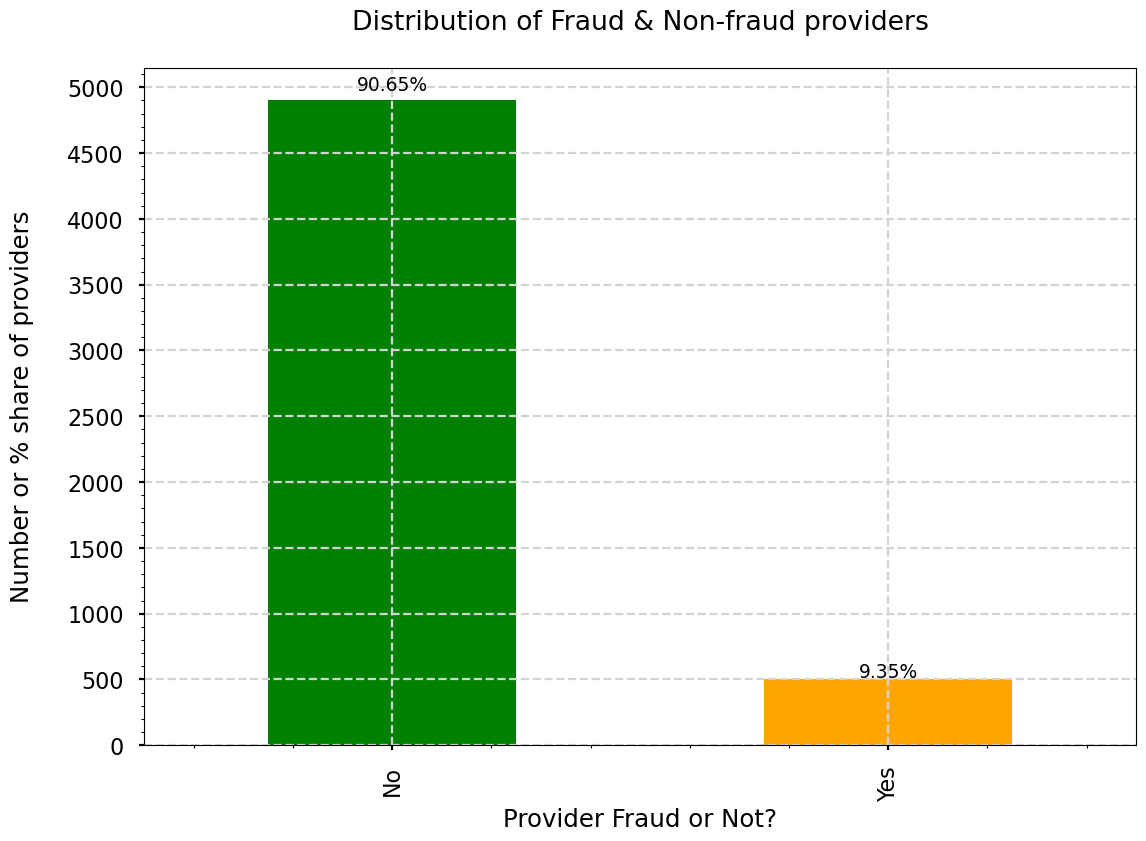

In [6]:
with plt.style.context('seaborn-poster'):
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?")
    plt.ylabel("Number or % share of providers\n")
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n")
    plt.plot();

Removing some entirely NULL Procedure Codes Features
TRAIN Set

In [7]:
train_ip_df.shape, train_op_df.shape

((40474, 30), (517737, 27))

In [8]:
(train_ip_df['ClmProcedureCode_4'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_5'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_6'].isna().sum() / train_ip_df.shape[0])*100
# (99.71339625438553, 99.97776350249543, 100.0)
(train_op_df['ClmProcedureCode_4'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_5'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_6'].isna().sum() / train_op_df.shape[0])*100

(train_ip_df['ClmProcedureCode_4'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_5'].isna().sum() / train_ip_df.shape[0])*100,\
(train_ip_df['ClmProcedureCode_6'].isna().sum() / train_ip_df.shape[0])*100
# (99.71339625438553, 99.97776350249543, 100.0)
(train_op_df['ClmProcedureCode_4'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_5'].isna().sum() / train_op_df.shape[0])*100,\
(train_op_df['ClmProcedureCode_6'].isna().sum() / train_op_df.shape[0])*100

(99.99961370348267, 100.0, 100.0)

In [9]:
(test_op_df['ClmProcedureCode_4'].isna().sum() / test_op_df.shape[0])*100,\
(test_op_df['ClmProcedureCode_5'].isna().sum() / test_op_df.shape[0])*100,\
(test_op_df['ClmProcedureCode_6'].isna().sum() / test_op_df.shape[0])*100

(100.0, 100.0, 100.0)

In [10]:
# Removing the above columns
train_ip_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)
train_op_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [11]:
test_ip_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)
test_op_df.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [12]:
# Converting the PROC CODES into STRING format
train_ip_df['ClmProcedureCode_1'] = train_ip_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_ip_df['ClmProcedureCode_2'] = train_ip_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_ip_df['ClmProcedureCode_3'] = train_ip_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

train_op_df['ClmProcedureCode_1'] = train_op_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_op_df['ClmProcedureCode_2'] = train_op_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
train_op_df['ClmProcedureCode_3'] = train_op_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

In [13]:
# Converting the PROC CODES into STRING format
test_ip_df['ClmProcedureCode_1'] = test_ip_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_ip_df['ClmProcedureCode_2'] = test_ip_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_ip_df['ClmProcedureCode_3'] = test_ip_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

test_op_df['ClmProcedureCode_1'] = test_op_df['ClmProcedureCode_1'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_op_df['ClmProcedureCode_2'] = test_op_df['ClmProcedureCode_2'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)
test_op_df['ClmProcedureCode_3'] = test_op_df['ClmProcedureCode_3'].apply(lambda val: str(val).split(".")[0] if val == val else np.NaN)

In [14]:
# Adding New Feature - 1 :: Admitted or Not Admitted indicator in IP and OP Dataset
# Adding in IP Dataset
train_ip_df["Admitted?"] = 1
test_ip_df["Admitted?"] = 1
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,42732,486,5119,29620,20300,NaN,3893,NaN,NaN,1


In [15]:
train_op_df["Admitted?"] = 0
test_op_df["Admitted?"] = 0
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


Merging the Datasets

In [16]:
# Commom columns must be 28
common_cols_tr = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols_tr)
# 25
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols_tr, right_on=common_cols_tr, how="outer")


# Merging the IP and OP dataset on the basis of common columns
test_ip_op_df = pd.merge(left=test_ip_df, right=test_op_df, left_on=common_cols_tr, right_on=common_cols_tr, how="outer")
test_ip_op_df.shape

(135392, 28)

In [17]:
# Merging the IP_OP Dataset with BENE Data
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape
# (558211, 52)
# Joining the IP_OP dataset with the BENE data
test_ip_op_bene_df = pd.merge(left=test_ip_op_df, right=test_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
test_ip_op_bene_df.shape

(135392, 52)

In [18]:
# (135392, 52)
# Merging the IP_OP_BENE Dataset with PROVIDER level Tgt Labels Data
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape
# (558211, 53)
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
test_iobp_df = pd.merge(left=test_ip_op_bene_df, right=test_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
test_iobp_df.shape

(135392, 52)

In [19]:
# Entire Dataset
train_iobp_df.shape
(558211, 53)
test_iobp_df.shape

(135392, 52)

In [20]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


In [21]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(test_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=test_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID
0,PRV51002,205
1,PRV51006,102
2,PRV51009,39
3,PRV51010,38
4,PRV51018,190
...,...,...
1348,PRV57713,11
1349,PRV57726,8
1350,PRV57745,2
1351,PRV57749,49


     PotentialFraud
No           345415
Yes          212796 



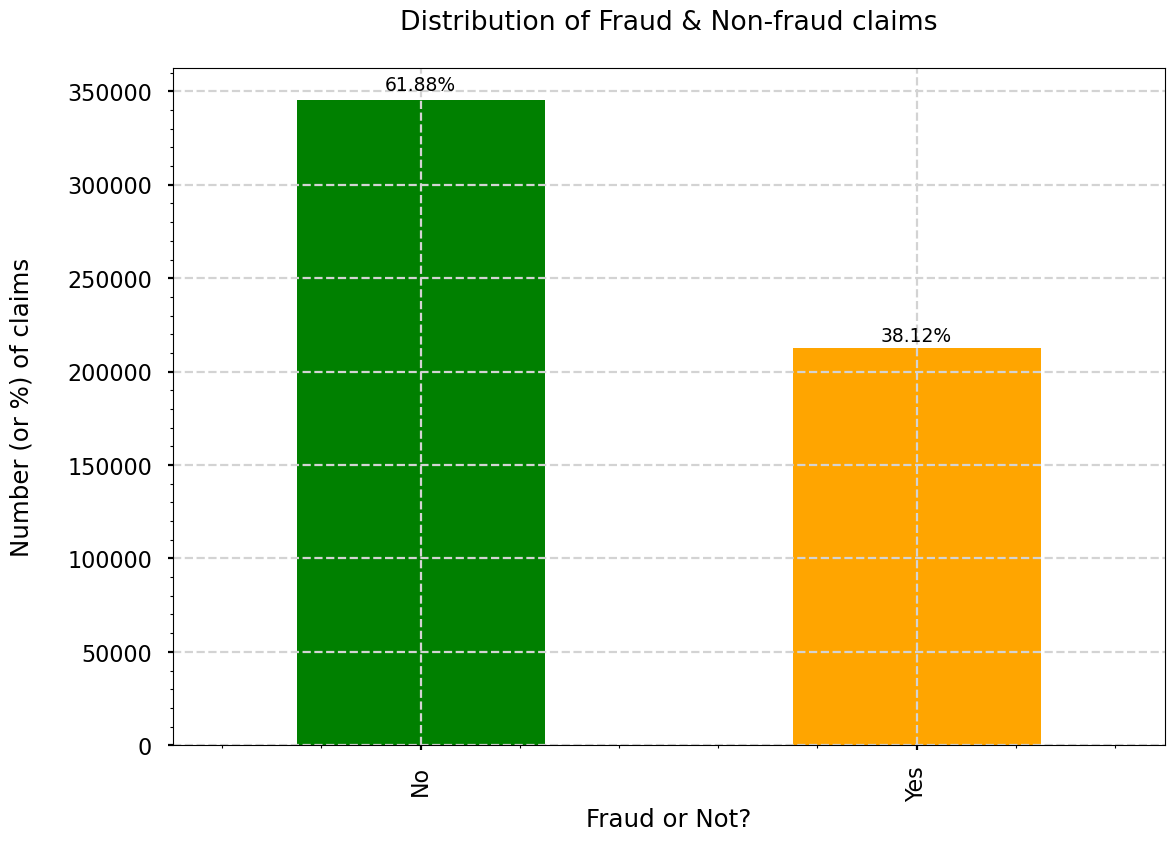

In [22]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?")
    plt.ylabel("Number (or %) of claims\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n")
    plt.plot();

VECTOR Embeddings
Generating the vector embeddings of ::
CLAIM Admit Diagnosis Codes
Diagnosis Codes
Procedure Codes
For now, I'm not including the Dx Related Group Code for generating the similarity score b/w these features.

VECTOR Embeddings
Generating the vector embeddings of ::
CLAIM Admit Diagnosis Codes
Diagnosis Codes
Procedure Codes
For now, I'm not including the Dx Related Group Code for generating the similarity score b/w these features.

In [23]:
import pickle 

# Loading the embeddings of CAD, DIAG and PROC codes
## Sentence embeddings are generated from the pre-trained Bio-BERT on PubMed and PMC datasets
### Dx and Proc Codes are downloaded from ICD-9 portal Effective from 2014
#### Refer Notebook --> CS_1_Codes_Desc_Embeddings.ipynb
with open('cad_diag_codes_embeddings.pkl', 'rb') as f:
    loaded_cad_dict = pickle.load(f)

with open('proc_codes_embeddings.pkl', 'rb') as f:
    loaded_proc_dict = pickle.load(f)

In [24]:
zeros_vec = np.zeros(shape=(1,768),dtype='float')

In [25]:
# Fetching the embeddings of every CAD and Dx CODE
train_iobp_df['Clm_Admit_Dx_embeddings'] = train_iobp_df['ClmAdmitDiagnosisCode'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_1_embeddings'] = train_iobp_df['ClmDiagnosisCode_1'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_2_embeddings'] = train_iobp_df['ClmDiagnosisCode_2'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_3_embeddings'] = train_iobp_df['ClmDiagnosisCode_3'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_4_embeddings'] = train_iobp_df['ClmDiagnosisCode_4'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_5_embeddings'] = train_iobp_df['ClmDiagnosisCode_5'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_6_embeddings'] = train_iobp_df['ClmDiagnosisCode_6'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_7_embeddings'] = train_iobp_df['ClmDiagnosisCode_7'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_8_embeddings'] = train_iobp_df['ClmDiagnosisCode_8'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_9_embeddings'] = train_iobp_df['ClmDiagnosisCode_9'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_Dx_10_embeddings'] = train_iobp_df['ClmDiagnosisCode_10'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))

In [26]:
# Fetching the embeddings of every CAD and Dx CODE
test_iobp_df['Clm_Admit_Dx_embeddings'] = test_iobp_df['ClmAdmitDiagnosisCode'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_1_embeddings'] = test_iobp_df['ClmDiagnosisCode_1'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_2_embeddings'] = test_iobp_df['ClmDiagnosisCode_2'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_3_embeddings'] = test_iobp_df['ClmDiagnosisCode_3'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_4_embeddings'] = test_iobp_df['ClmDiagnosisCode_4'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_5_embeddings'] = test_iobp_df['ClmDiagnosisCode_5'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_6_embeddings'] = test_iobp_df['ClmDiagnosisCode_6'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_7_embeddings'] = test_iobp_df['ClmDiagnosisCode_7'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_8_embeddings'] = test_iobp_df['ClmDiagnosisCode_8'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_9_embeddings'] = test_iobp_df['ClmDiagnosisCode_9'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_Dx_10_embeddings'] = test_iobp_df['ClmDiagnosisCode_10'].apply(lambda code: loaded_cad_dict.get(code,zeros_vec[0]))
# Adding the embeddings of all the Dx Codes for every claim
train_iobp_df['Clm_All_Dx_embeddings'] = train_iobp_df[['Clm_Dx_1_embeddings','Clm_Dx_2_embeddings','Clm_Dx_3_embeddings','Clm_Dx_4_embeddings','Clm_Dx_5_embeddings','Clm_Dx_6_embeddings','Clm_Dx_7_embeddings','Clm_Dx_8_embeddings','Clm_Dx_9_embeddings','Clm_Dx_10_embeddings']]\
.apply(lambda row : row['Clm_Dx_1_embeddings'] + row['Clm_Dx_2_embeddings'] + row['Clm_Dx_3_embeddings'] + row['Clm_Dx_4_embeddings'] + row['Clm_Dx_5_embeddings'] + row['Clm_Dx_6_embeddings'] + row['Clm_Dx_7_embeddings'] + row['Clm_Dx_8_embeddings'] + row['Clm_Dx_9_embeddings'] + row['Clm_Dx_10_embeddings'], axis=1)

In [27]:
# Final embeddings of all the Dx Codes for every claim
train_iobp_df['Clm_All_Dx_embeddings']

0         [0.9678052412346005, 1.6423875028267503, -1.30...
1         [1.30414180457592, 1.4621049482375383, -1.3063...
2         [0.8069967683404684, 1.3780399085953832, -1.21...
3         [1.0197997465729713, 1.4949923837557435, -0.58...
4         [1.2688028439879417, 0.9786814162507653, -0.30...
                                ...                        
558206    [0.6410285793244839, 0.139002975076437, -0.414...
558207    [0.29387184977531433, 0.032951388508081436, -0...
558208    [0.1727948859333992, 0.6853120625019073, -0.45...
558209    [0.1868998408317566, 0.3849315941333771, -0.16...
558210    [0.09751432272605598, 0.26662084460258484, -0....
Name: Clm_All_Dx_embeddings, Length: 558211, dtype: object

In [28]:
# Adding the embeddings of all the Dx Codes for every claim
test_iobp_df['Clm_All_Dx_embeddings'] = test_iobp_df[['Clm_Dx_1_embeddings','Clm_Dx_2_embeddings','Clm_Dx_3_embeddings','Clm_Dx_4_embeddings','Clm_Dx_5_embeddings','Clm_Dx_6_embeddings','Clm_Dx_7_embeddings','Clm_Dx_8_embeddings','Clm_Dx_9_embeddings','Clm_Dx_10_embeddings']]\
.apply(lambda row : row['Clm_Dx_1_embeddings'] + row['Clm_Dx_2_embeddings'] + row['Clm_Dx_3_embeddings'] + row['Clm_Dx_4_embeddings'] + row['Clm_Dx_5_embeddings'] + row['Clm_Dx_6_embeddings'] + row['Clm_Dx_7_embeddings'] + row['Clm_Dx_8_embeddings'] + row['Clm_Dx_9_embeddings'] + row['Clm_Dx_10_embeddings'], axis=1)
# Final embeddings of all the Dx Codes for every claim
test_iobp_df['Clm_All_Dx_embeddings']

0         [0.6438316721469164, 2.163996056653559, -1.585...
1         [1.3458348102867603, 1.3714876929298043, -0.68...
2         [1.3597857274580747, 1.0866809133440256, -1.02...
3         [1.209467918612063, 1.0890447879210114, -0.271...
4         [0.5807230211794376, 1.6170704737305641, -0.99...
                                ...                        
135387    [1.4863854311406612, 1.1393327005207539, -1.06...
135388    [0.22494754195213318, 0.05418386682868004, -0....
135389    [0.5574011146090925, 0.5943227931857109, -0.45...
135390    [0.2821866199374199, 0.5696764439344406, -0.54...
135391    [0.4634277820587158, 0.5886942557990551, -0.74...
Name: Clm_All_Dx_embeddings, Length: 135392, dtype: object

In [29]:
# Fetching the embeddings of every PROC Code
train_iobp_df['Clm_PROC_1_embeddings'] = train_iobp_df['ClmProcedureCode_1'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_PROC_2_embeddings'] = train_iobp_df['ClmProcedureCode_2'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
train_iobp_df['Clm_PROC_3_embeddings'] = train_iobp_df['ClmProcedureCode_3'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
# Fetching the embeddings of every PROC Code
test_iobp_df['Clm_PROC_1_embeddings'] = test_iobp_df['ClmProcedureCode_1'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_PROC_2_embeddings'] = test_iobp_df['ClmProcedureCode_2'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))
test_iobp_df['Clm_PROC_3_embeddings'] = test_iobp_df['ClmProcedureCode_3'].apply(lambda code: loaded_proc_dict.get(code,zeros_vec[0]))

In [30]:
# Adding the embeddings of all the PROC Codes for every claim
train_iobp_df['Clm_All_PROC_embeddings'] = train_iobp_df[['Clm_PROC_1_embeddings','Clm_PROC_2_embeddings','Clm_PROC_3_embeddings']]\
.apply(lambda row : row['Clm_PROC_1_embeddings'] + row['Clm_PROC_2_embeddings'] + row['Clm_PROC_3_embeddings'], axis=1)
# Final embeddings of all the PROC Codes for every claim
train_iobp_df['Clm_All_PROC_embeddings']

0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [0.3849864900112152, 0.1121806651353836, -0.51...
3         [0.2294469177722931, 0.3657669425010681, -0.20...
4         [-0.06431667506694794, 0.015989957377314568, -...
                                ...                        
558206    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558207    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558208    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558209    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
558210    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clm_All_PROC_embeddings, Length: 558211, dtype: object

In [32]:
# Adding the embeddings of all the PROC Codes for every claim
test_iobp_df['Clm_All_PROC_embeddings'] = test_iobp_df[['Clm_PROC_1_embeddings','Clm_PROC_2_embeddings','Clm_PROC_3_embeddings']]\
.apply(lambda row : row['Clm_PROC_1_embeddings'] + row['Clm_PROC_2_embeddings'] + row['Clm_PROC_3_embeddings'], axis=1)
# Final embeddings of all the PROC Codes for every claim
test_iobp_df['Clm_All_PROC_embeddings']

0         [0.23038002103567123, 0.10825760662555695, -0....
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [-0.030945993959903717, 0.476326584815979, 0.2...
3         [-0.04374227300286293, 0.37726446986198425, -0...
4         [0.11961781233549118, 0.18316590785980225, -0....
                                ...                        
135387    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135388    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135389    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135390    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
135391    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clm_All_PROC_embeddings, Length: 135392, dtype: object

In [33]:
from scipy.spatial import distance
# Generating the similarity scores features
## Similarity b/w CAD and Dx Codes
## Similarity b/w CAD and Proc Codes
## Similarity b/w Dx and Proc Codes
train_iobp_df['Clm_Admit_Diag_Dx_Similarity'] = train_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_Dx_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_Dx_embeddings']), axis=1)
train_iobp_df['Clm_Admit_Diag_Proc_Similarity'] = train_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)
train_iobp_df['Clm_Dx_Proc_Similarity'] = train_iobp_df[['Clm_All_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_All_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)

C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [34]:
train_iobp_df['Clm_Admit_Diag_Dx_Similarity'].fillna(value=0,inplace=True)
train_iobp_df['Clm_Admit_Diag_Proc_Similarity'].fillna(value=0,inplace=True)
train_iobp_df['Clm_Dx_Proc_Similarity'].fillna(value=0,inplace=True)
train_iobp_df['Clm_CAD_Dx_Proc_Similarity'] = train_iobp_df['Clm_Admit_Diag_Dx_Similarity'] + train_iobp_df['Clm_Admit_Diag_Proc_Similarity'] + train_iobp_df['Clm_Dx_Proc_Similarity']

In [35]:
#  Generating the similarity scores features
## Similarity b/w CAD and Dx Codes
## Similarity b/w CAD and Proc Codes
## Similarity b/w Dx and Proc Codes
test_iobp_df['Clm_Admit_Diag_Dx_Similarity'] = test_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_Dx_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_Dx_embeddings']), axis=1)
test_iobp_df['Clm_Admit_Diag_Proc_Similarity'] = test_iobp_df[['Clm_Admit_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_Admit_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)
test_iobp_df['Clm_Dx_Proc_Similarity'] = test_iobp_df[['Clm_All_Dx_embeddings','Clm_All_PROC_embeddings']].apply(lambda row: 1 - distance.cosine(row['Clm_All_Dx_embeddings'], row['Clm_All_PROC_embeddings']), axis=1)
test_iobp_df['Clm_Admit_Diag_Dx_Similarity'].fillna(value=0,inplace=True)
test_iobp_df['Clm_Admit_Diag_Proc_Similarity'].fillna(value=0,inplace=True)
test_iobp_df['Clm_Dx_Proc_Similarity'].fillna(value=0,inplace=True)
test_iobp_df['Clm_CAD_Dx_Proc_Similarity'] = test_iobp_df['Clm_Admit_Diag_Dx_Similarity'] + test_iobp_df['Clm_Admit_Diag_Proc_Similarity'] + test_iobp_df['Clm_Dx_Proc_Similarity']

C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\Sheriff\anaconda3\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [36]:
# Dropping the individual CAD, Dx and PROC embeddings features
train_iobp_df.drop(['Clm_Admit_Dx_embeddings',
'Clm_Dx_1_embeddings',
'Clm_Dx_2_embeddings',
'Clm_Dx_3_embeddings',
'Clm_Dx_4_embeddings',
'Clm_Dx_5_embeddings',
'Clm_Dx_6_embeddings',
'Clm_Dx_7_embeddings',
'Clm_Dx_8_embeddings',
'Clm_Dx_9_embeddings',
'Clm_Dx_10_embeddings',
'Clm_PROC_1_embeddings',
'Clm_PROC_2_embeddings',
'Clm_PROC_3_embeddings'],axis=1,inplace=True)

test_iobp_df.drop(['Clm_Admit_Dx_embeddings',
'Clm_Dx_1_embeddings',
'Clm_Dx_2_embeddings',
'Clm_Dx_3_embeddings',
'Clm_Dx_4_embeddings',
'Clm_Dx_5_embeddings',
'Clm_Dx_6_embeddings',
'Clm_Dx_7_embeddings',
'Clm_Dx_8_embeddings',
'Clm_Dx_9_embeddings',
'Clm_Dx_10_embeddings',
'Clm_PROC_1_embeddings',
'Clm_PROC_2_embeddings',
'Clm_PROC_3_embeddings'],axis=1,inplace=True)

### Feature Engineering

In [37]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")
test_iobp_df['DOB'] = pd.to_datetime(test_iobp_df['DOB'], format="%Y-%m-%d")
test_iobp_df['DOD'] = pd.to_datetime(test_iobp_df['DOD'], format="%Y-%m-%d")
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')
test_iobp_df['Is_Alive?'] = test_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [38]:
train_iobp_df['Is_Alive?'].value_counts()

test_iobp_df['Is_Alive?'].value_counts()

No     134352
Yes      1040
Name: Is_Alive?, dtype: int64

In [39]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days
test_iobp_df['ClaimStartDt'] = pd.to_datetime(test_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
test_iobp_df['ClaimEndDt'] = pd.to_datetime(test_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

test_iobp_df['Claim_Duration'] = (test_iobp_df['ClaimEndDt'] - test_iobp_df['ClaimStartDt']).dt.days

In [40]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days
test_iobp_df['ClaimStartDt'] = pd.to_datetime(test_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
test_iobp_df['ClaimEndDt'] = pd.to_datetime(test_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

test_iobp_df['Claim_Duration'] = (test_iobp_df['ClaimEndDt'] - test_iobp_df['ClaimStartDt']).dt.days

In [41]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days
test_iobp_df['AdmissionDt'] = pd.to_datetime(test_iobp_df['AdmissionDt'], format="%Y-%m-%d")
test_iobp_df['DischargeDt'] = pd.to_datetime(test_iobp_df['DischargeDt'], format="%Y-%m-%d")

test_iobp_df['Admitted_Duration'] = (test_iobp_df['DischargeDt'] - test_iobp_df['AdmissionDt']).dt.days

In [43]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)
# Filling the Null values as MAX Date of Death in the Dataset
test_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
test_iobp_df['DOD'] = pd.to_datetime(test_iobp_df['DOD'], format="%Y-%m-%d")
test_iobp_df['DOB'] = pd.to_datetime(test_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)
test_iobp_df['Bene_Age'] = round(((test_iobp_df['DOD'] - test_iobp_df['DOB']).dt.days)/365,1)

In [44]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(test_iobp_df['AttendingPhysician'].nunique()))
# Unique number of Attending Physicians present in the dataset are --> 21555
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

Unique number of Attending Physicians present in the dataset are --> 21555


count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

In [45]:
test_iobp_df['Att_Phy_tot_claims'] = test_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df['Att_Phy_tot_claims'].describe()

count    135045.000000
mean         98.502669
std         171.003866
min           1.000000
25%           6.000000
50%          26.000000
75%          97.000000
max         939.000000
Name: Att_Phy_tot_claims, dtype: float64

In [46]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))
# Unique number of Operating Physicians present in the dataset are --> 35315
# # Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(test_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315
Unique number of Operating Physicians present in the dataset are --> 8970


In [47]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [48]:
test_iobp_df['Opr_Phy_tot_claims'] = test_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
test_iobp_df['Opr_Phy_tot_claims'].describe()

count    27193.000000
mean        22.654838
std         37.219802
min          1.000000
25%          2.000000
50%          6.000000
75%         24.000000
max        170.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [49]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()
test_iobp_df['Oth_Phy_tot_claims'] = test_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df['Oth_Phy_tot_claims'].describe()

count    48632.000000
mean        72.746052
std        195.492974
min          1.000000
25%          3.000000
50%         12.000000
75%         46.000000
max       1205.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [50]:
 #Creating the combined feature
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)
# Creating the combined feature
test_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
test_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
test_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']
test_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = test_iobp_df['Att_Phy_tot_claims'] + test_iobp_df['Opr_Phy_tot_claims'] + test_iobp_df['Oth_Phy_tot_claims']
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [51]:
train_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)
test_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

In [52]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')
test_iobp_df["Prv_Tot_Att_Phy"] = test_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
test_iobp_df["Prv_Tot_Opr_Phy"] = test_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
test_iobp_df["Prv_Tot_Oth_Phy"] = test_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [53]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

In [54]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']
test_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = test_iobp_df['Prv_Tot_Att_Phy'] + test_iobp_df['Prv_Tot_Opr_Phy'] + test_iobp_df['Prv_Tot_Oth_Phy']
train_iobp_df["Prv_Tot_Att_Opr_Oth_Phys"].describe()

count    558211.000000
mean       1282.017685
std        1993.415913
min           1.000000
25%         192.000000
50%         560.000000
75%        1567.000000
max       12857.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

In [55]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)
test_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

In [56]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')
test_iobp_df['PRV_Tot_Admit_DCodes'] = test_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')
train_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

In [57]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')
test_iobp_df['PRV_Tot_DGrpCodes'] = test_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')
train_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

In [58]:


train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year
test_iobp_df['DOB_Year'] = test_iobp_df['DOB'].dt.year
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')
test_iobp_df['PRV_Tot_Unq_DOB_Years'] = test_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [59]:
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)
test_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

In [60]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')
test_iobp_df['PRV_Bene_Age_Sum'] = test_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

In [61]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')
test_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = test_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

In [62]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)
test_iobp_df['RenalDiseaseIndicator'] = test_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')
test_iobp_df['PRV_Tot_RKD_Patients'] = test_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [63]:
# Dropping these 2 columns as there 99% of values are same
train_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)
# Dropping these 2 columns as there 99% of values are same
test_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
test_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)
train_iobp_df.shape

(558211, 69)

In [64]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [65]:
# PRV Aggregate features
test_iobp_df["PRV_CoPayment"] = test_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
test_iobp_df["PRV_IP_Annual_ReImb_Amt"] = test_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
test_iobp_df["PRV_IP_Annual_Ded_Amt"] = test_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
test_iobp_df["PRV_OP_Annual_ReImb_Amt"] = test_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
test_iobp_df["PRV_OP_Annual_Ded_Amt"] = test_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
test_iobp_df["PRV_Admit_Duration"] = test_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
test_iobp_df["PRV_Claim_Duration"] = test_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [66]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)
    test_iobp_df[feat_1] = test_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)
    test_iobp_df[feat_2] = test_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobp_df[feat_3] = train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)
    test_iobp_df[feat_3] = test_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobp_df[feat_4] = train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)
    test_iobp_df[feat_4] = test_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)
    test_iobp_df[feat_5] = test_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
    test_iobp_df[feat_6] = test_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobp_df[feat_7] = train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)
    test_iobp_df[feat_7] = test_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobp_df[feat_8] = train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)
    test_iobp_df[feat_8] = test_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [67]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")
train_iobp_df.shape
(558211, 124)

(558211, 124)

### Adding Aggregated Features :: Based on various combinations of different levels in order to introduce their interactions in the dataset.
- PROVIDER <--> BENE <--> PHYSICIANS
- PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES
- PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES
- PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES and etc..

Reasoning :: The idea behind adding the aggregated features based on the combinations of various features is that many parties or entities might work together to make a medicare fraud. Thus, we need to capture interactions among them to better classify the fraudsters.

In [68]:
# PROVIDER <--> other features :: To get claim counts
train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_AttendingPhysician"]=train_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OtherPhysician"]=train_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OperatingPhysician"]=train_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df.shape

(558211, 132)

In [69]:
# PROVIDER <--> other features :: To get claim counts
test_iobp_df["ClmCount_Provider"]=test_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID"]=test_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_AttendingPhysician"]=test_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_OtherPhysician"]=test_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_OperatingPhysician"]=test_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
test_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=test_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=test_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
test_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=test_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
test_iobp_df.shape

# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)
test_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)
train_iobp_df.shape

(558211, 104)

In [70]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)
# Filling Nulls in Deductible Amt Paid by Patient
test_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [71]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [72]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
test_iobp_df['Gender'] = test_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['Is_Alive?'] = test_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

test_iobp_df['ChronicCond_Alzheimer'] = test_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Heartfailure'] = test_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_KidneyDisease'] = test_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Cancer'] = test_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_ObstrPulmonary'] = test_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Depression'] = test_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Diabetes'] = test_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_IschemicHeart'] = test_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_Osteoporasis'] = test_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_rheumatoidarthritis'] = test_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
test_iobp_df['ChronicCond_stroke'] = test_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)
# Encoding the Categorical features
test_iobp_df = pd.get_dummies(test_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [73]:
pd.set_option('display.max_rows',120)
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


In [74]:
# Checking Nulls in the features
pd.DataFrame(test_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


In [75]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)
# Filling Nulls in the aggregated features
test_iobp_df.fillna(value=0, inplace=True)
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


In [76]:
# Checking Nulls in the features
pd.DataFrame(test_iobp_df.isna().sum())

,0
Provider,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0
ChronicCond_KidneyDisease,0
ChronicCond_Cancer,0
ChronicCond_ObstrPulmonary,0
ChronicCond_Depression,0


### Entire Data Aggregation :: At provider level
Reasoning :: The main objective is to predict the Medicare Provider Fraud. Thus, here we are grouping the entire dataset at the level of PROVIDER and taking SUM of all the columns to create n-dimensional representation of each provider.

In [77]:
train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
test_iobp_df = test_iobp_df.groupby(['Provider'],as_index=False).agg('sum')
train_iobp_df.shape

(5410, 104)

Data Segregation :: Creating separate sets of independent features and target column.
Reasoning :: These sets will be used for training the ML Models.

In [78]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']
X_unseen = test_iobp_df.drop(axis=1, columns=['Provider'])
y_unseen_prvs = test_iobp_df['Provider']
X.shape, type(X), y.shape, type(y)

((5410, 102), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [79]:
X_unseen.shape, type(X), y_unseen_prvs.shape, type(y_unseen_prvs)

((1353, 102), pandas.core.frame.DataFrame, (1353,), pandas.core.series.Series)

Train Test Split :: Creating TRAIN and VALIDATION sets.¶
Reasoning :: These sets will be used for measurng the performance of ML Models.

In [80]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 102), (1082, 102), (4328,), (1082,))

In [81]:
# Checking count of tgt labels in y_train
y_train.value_counts()

# Checking count of tgt labels in y_test
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

In [82]:
from sklearn.preprocessing import RobustScaler
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)
X_unseen_std = robust_scaler.transform(X_unseen)

## Baseline Model Training¶
Using Class Weighting Scheme
1. Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.03, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

In [91]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)")
      plt.ylabel("True Positive Rate(TPR)")
      plt.title("Area Under Curve")
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix')
        ax[0].set_xlabel("Predicted Label")
        ax[0].set_ylabel("Actual Label")

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix')
        ax[1].set_xlabel("Predicted Label")
        ax[1].set_ylabel("Actual Label")
    
    plt.show()
    
    return train_prediction, test_prediction

In [92]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

### Train AUC = 0.9417320455811407
### Test AUC = 0.9437833691626043


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


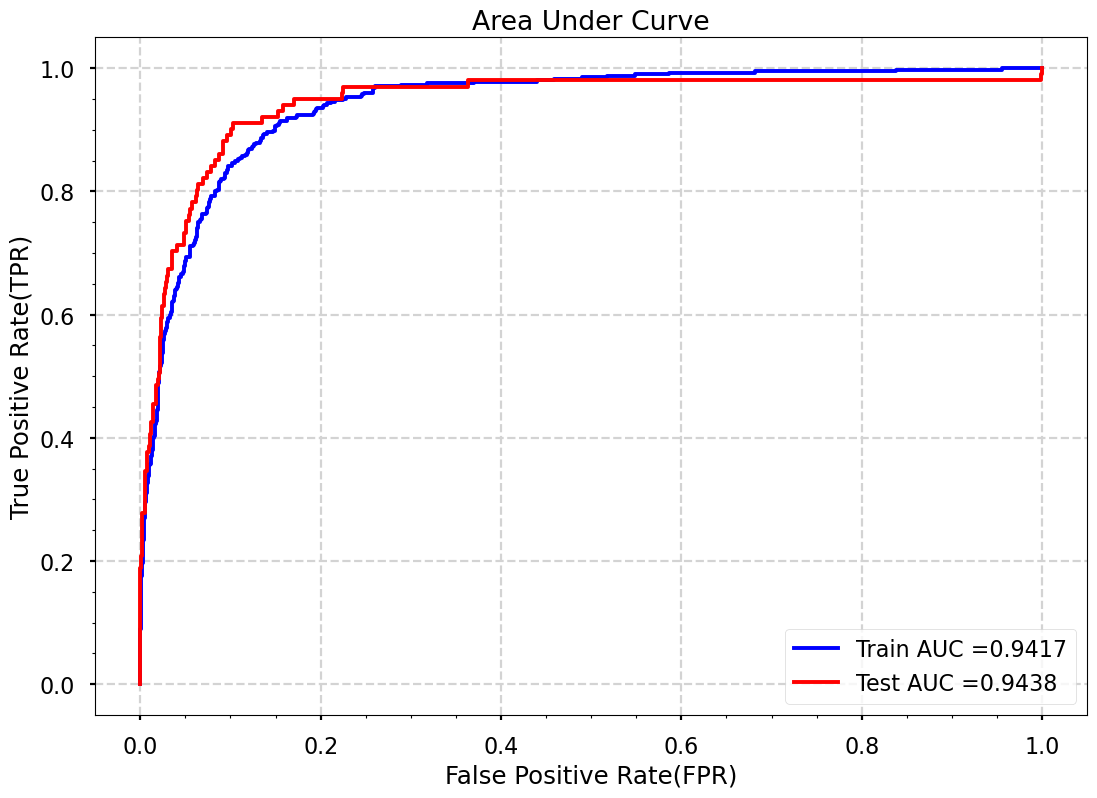

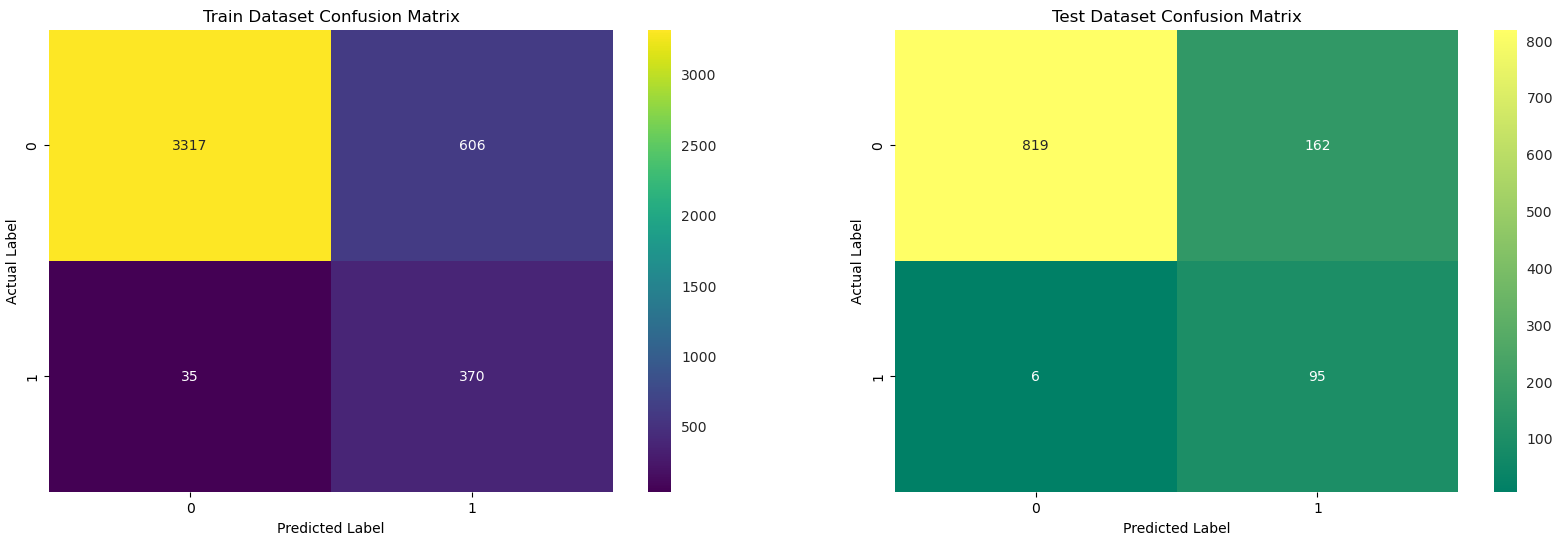



### Best Threshold = 0.3369
### Model AUC is : 0.9438
### Model Train F1 Score is : 0.5358
### Model Test F1 Score is : 0.5307


In [93]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [94]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.539295
1,Admitted_Duration,0.439222
2,PRV_Tot_DGrpCodes,-0.030426
3,PRV_Tot_Unq_DOB_Years,-0.247869
4,PRV_Bene_Age_Sum,0.027942


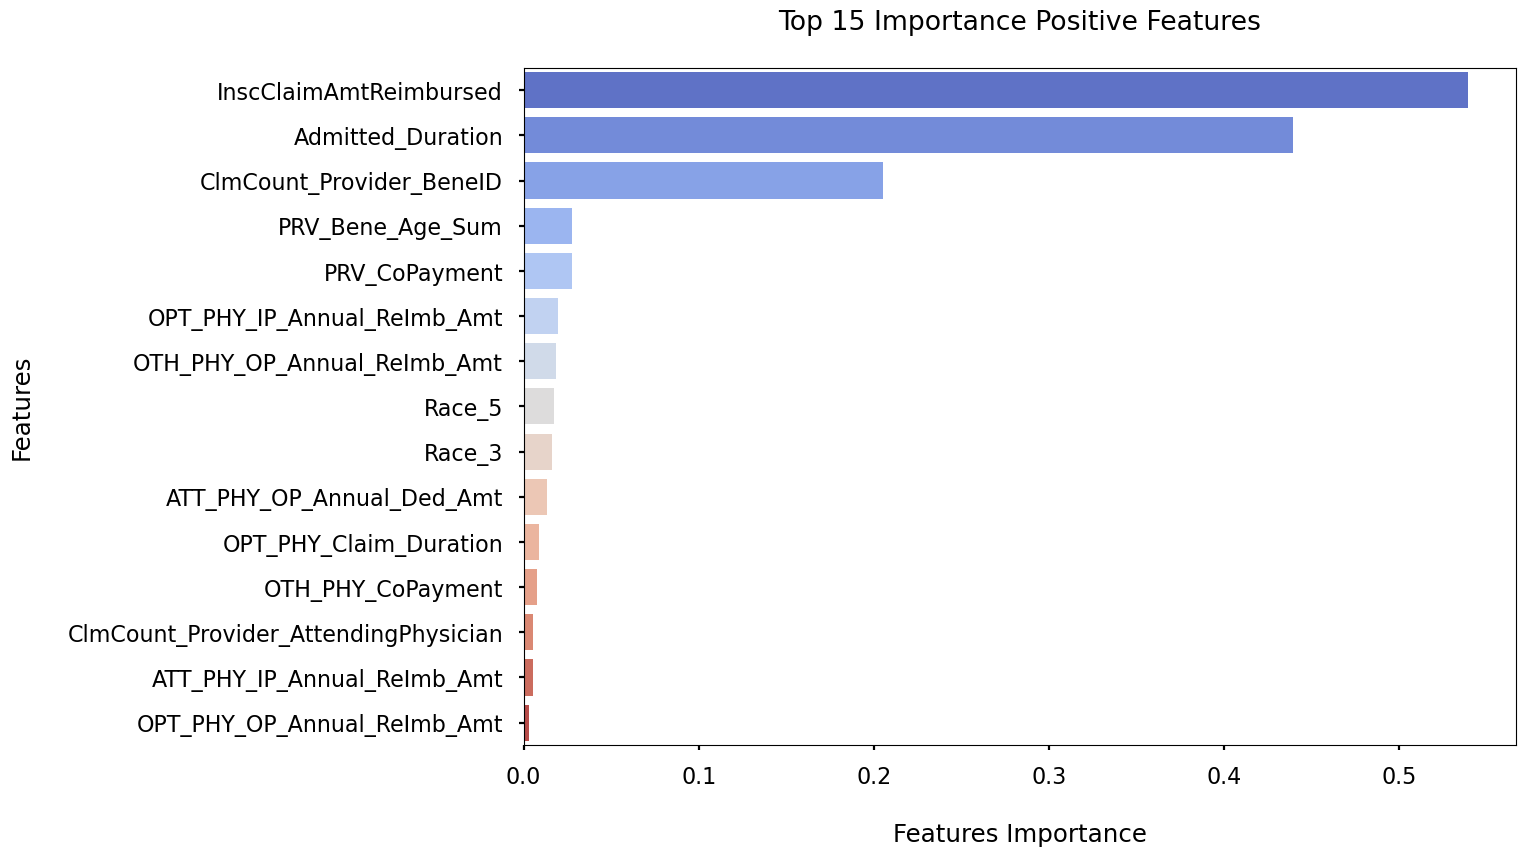

In [95]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

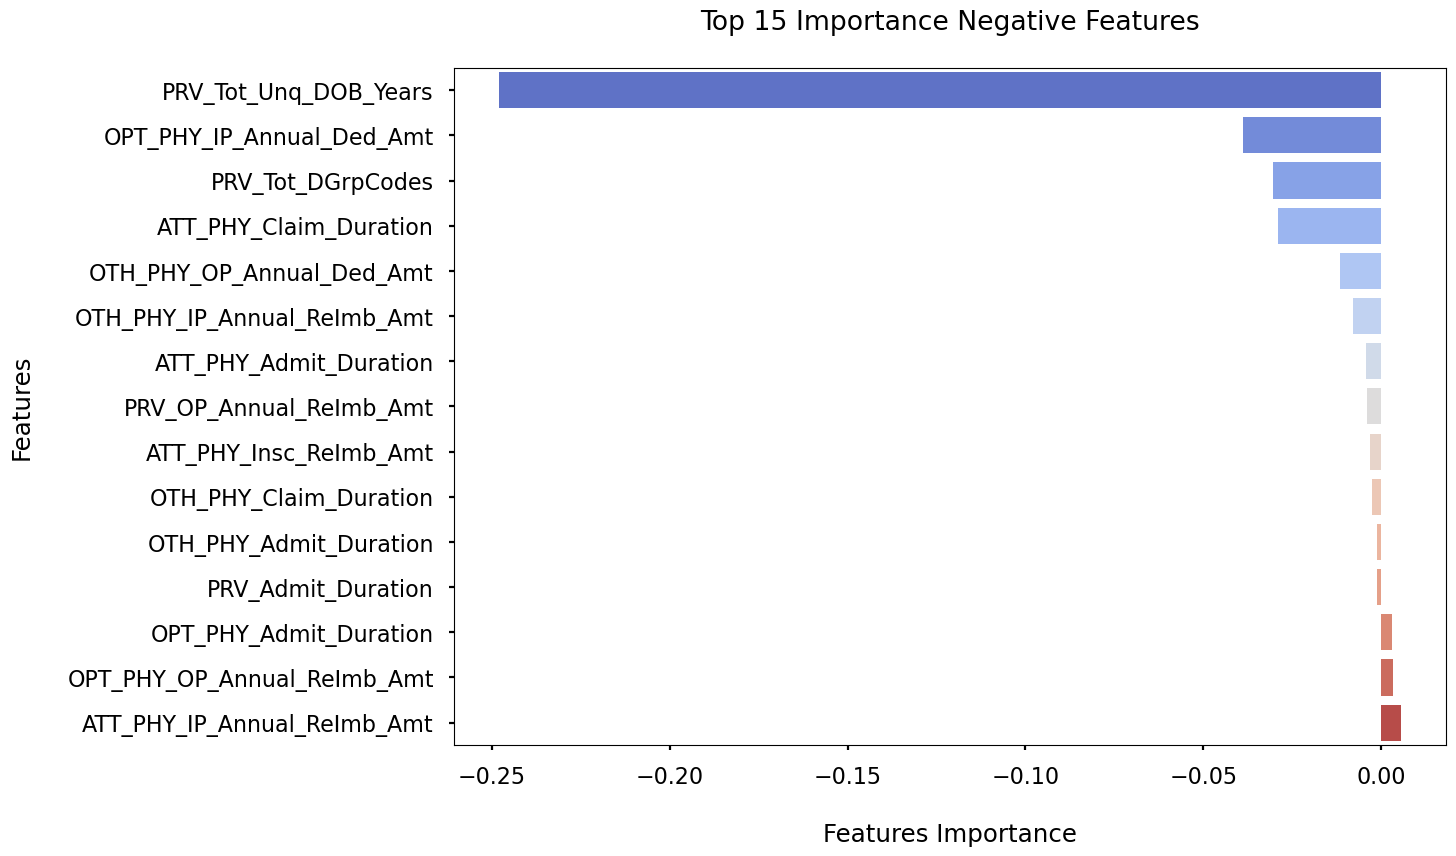

In [97]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Negative Features\n")

### Train AUC = 0.945017198352231
### Test AUC = 0.9461602123515104


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


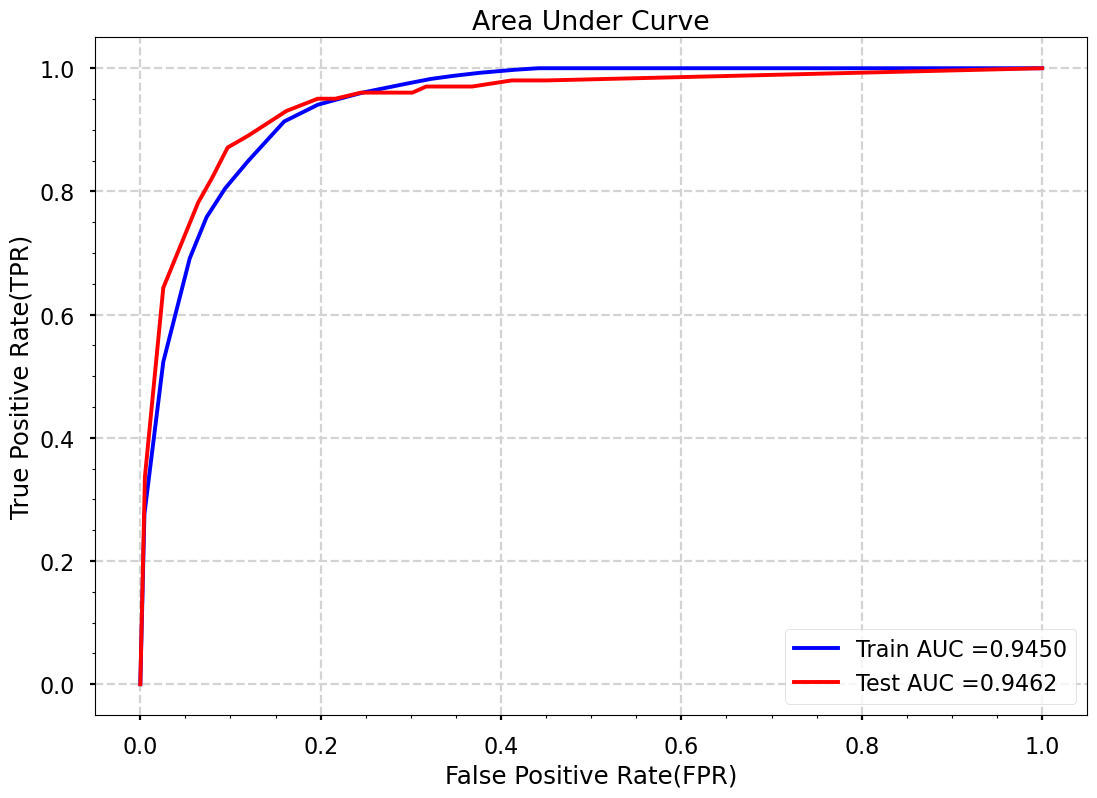

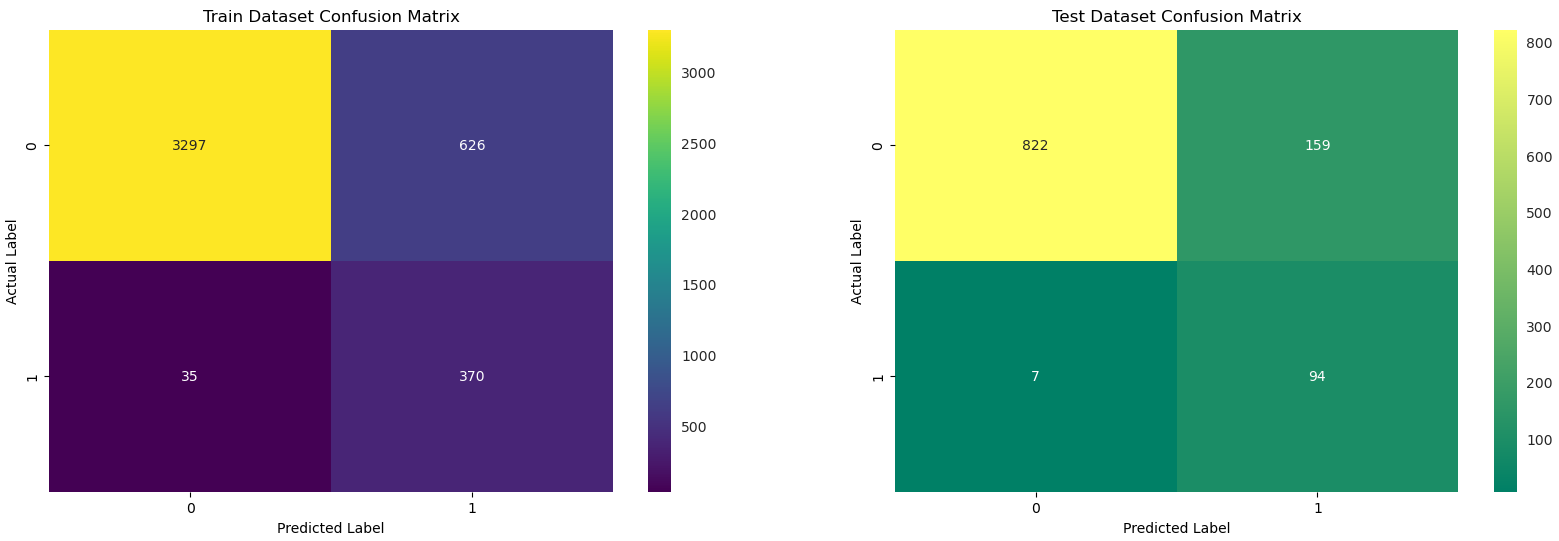



### Best Threshold = 0.6160
### Model AUC is : 0.9462
### Model Train F1 Score is : 0.5282
### Model Test F1 Score is : 0.5311


In [99]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)
# DecisionTreeClassifier(class_weight='balanced', max_depth=6,
#                        max_features='auto', min_samples_leaf=100,
#                        min_samples_split=50, random_state=49)
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [100]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,1.387090e-01
1,DeductibleAmtPaid,1.909211e-03
2,ChronicCond_Cancer,1.658138e-16
3,OPAnnualDeductibleAmt,7.829921e-03
4,Clm_Admit_Diag_Proc_Similarity,1.924751e-15


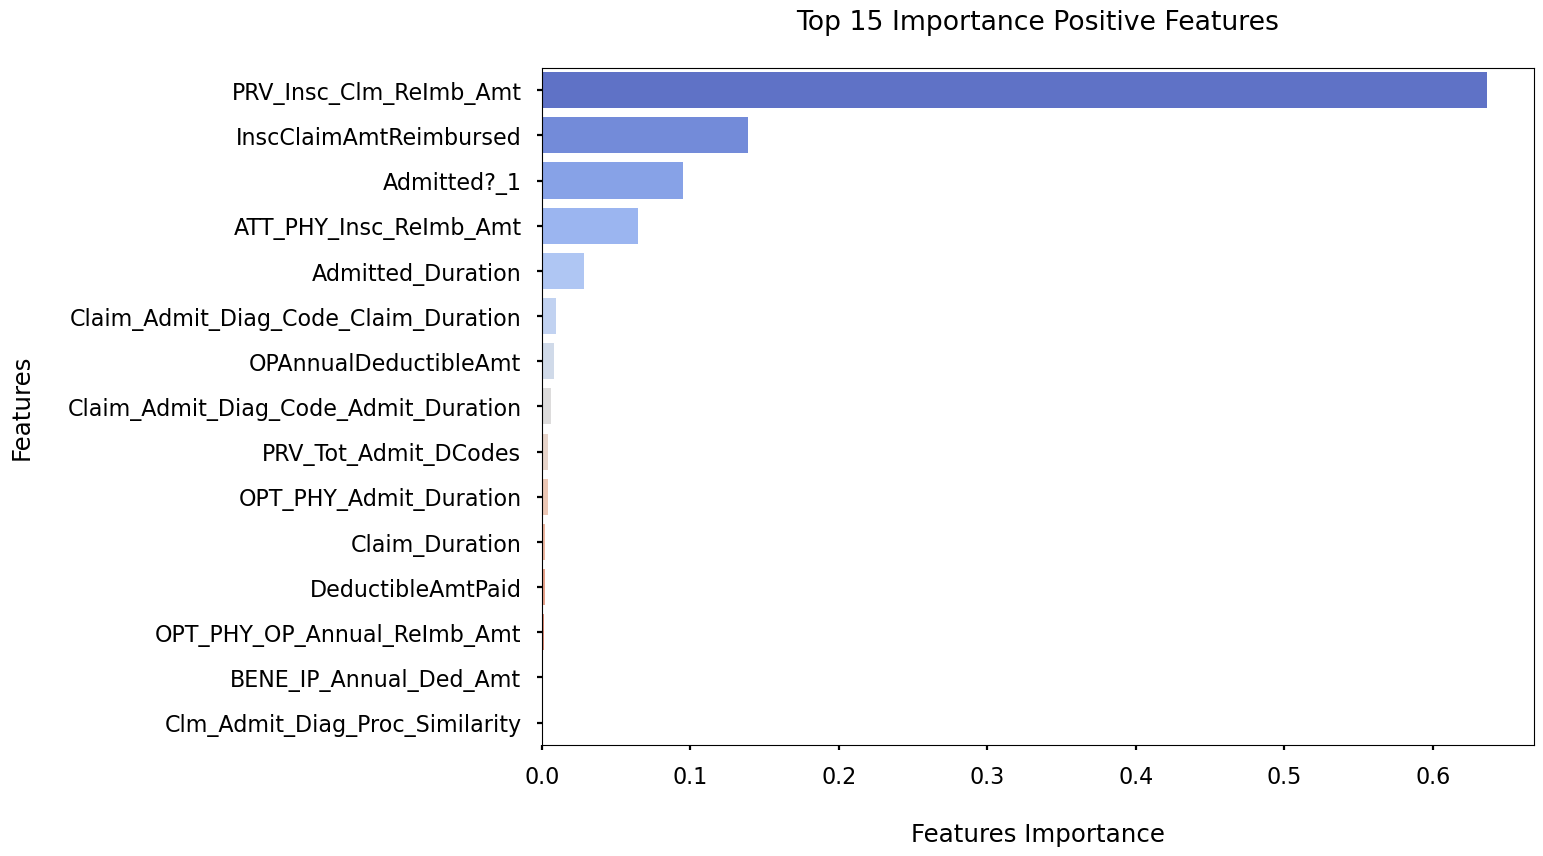

In [101]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

In [103]:
# 3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9473894065703057
### Test AUC = 0.9516002058921489


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


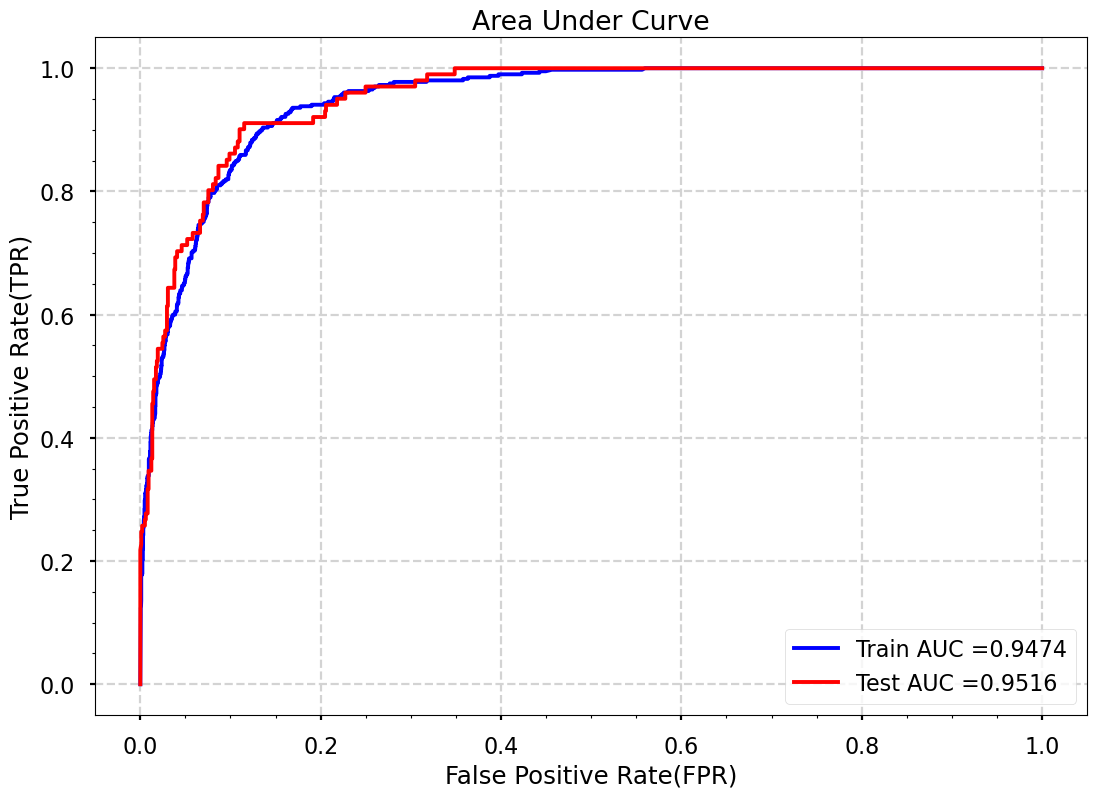

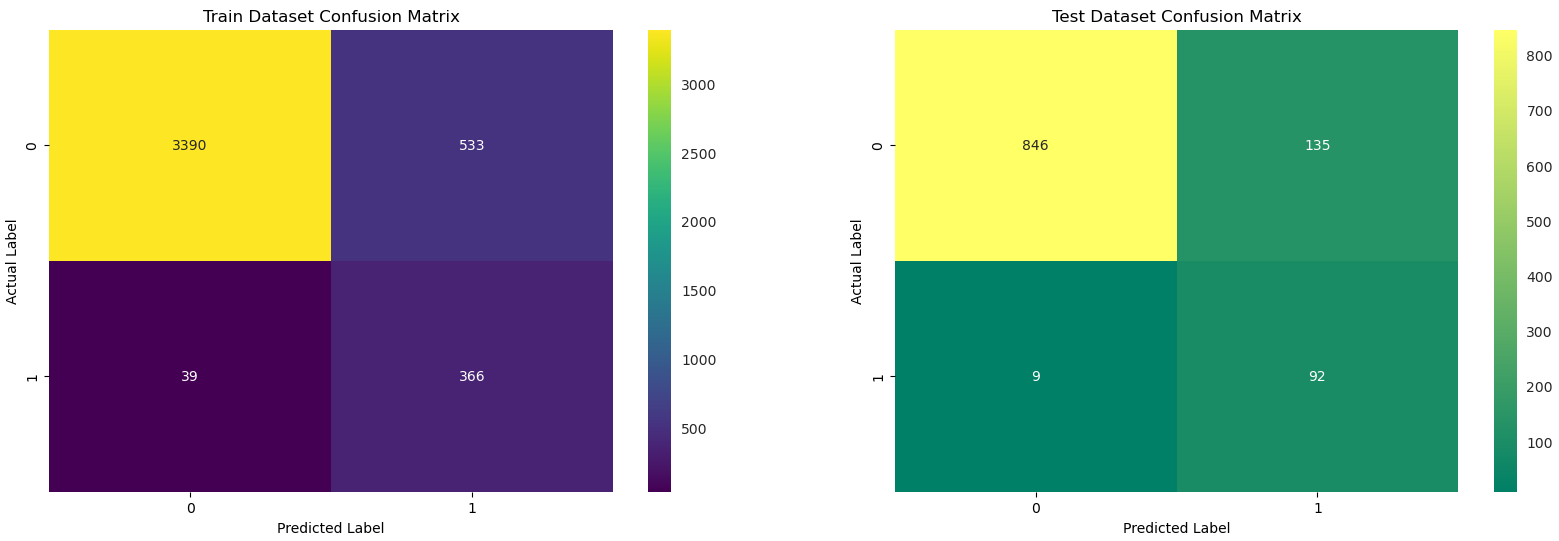



### Best Threshold = 0.5161
### Model AUC is : 0.9516
### Model Train F1 Score is : 0.5613
### Model Test F1 Score is : 0.5610


In [104]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [105]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.096383
1,DeductibleAmtPaid,0.036447
2,RenalDiseaseIndicator,0.000225
3,ChronicCond_Alzheimer,0.005393
4,ChronicCond_KidneyDisease,0.002140


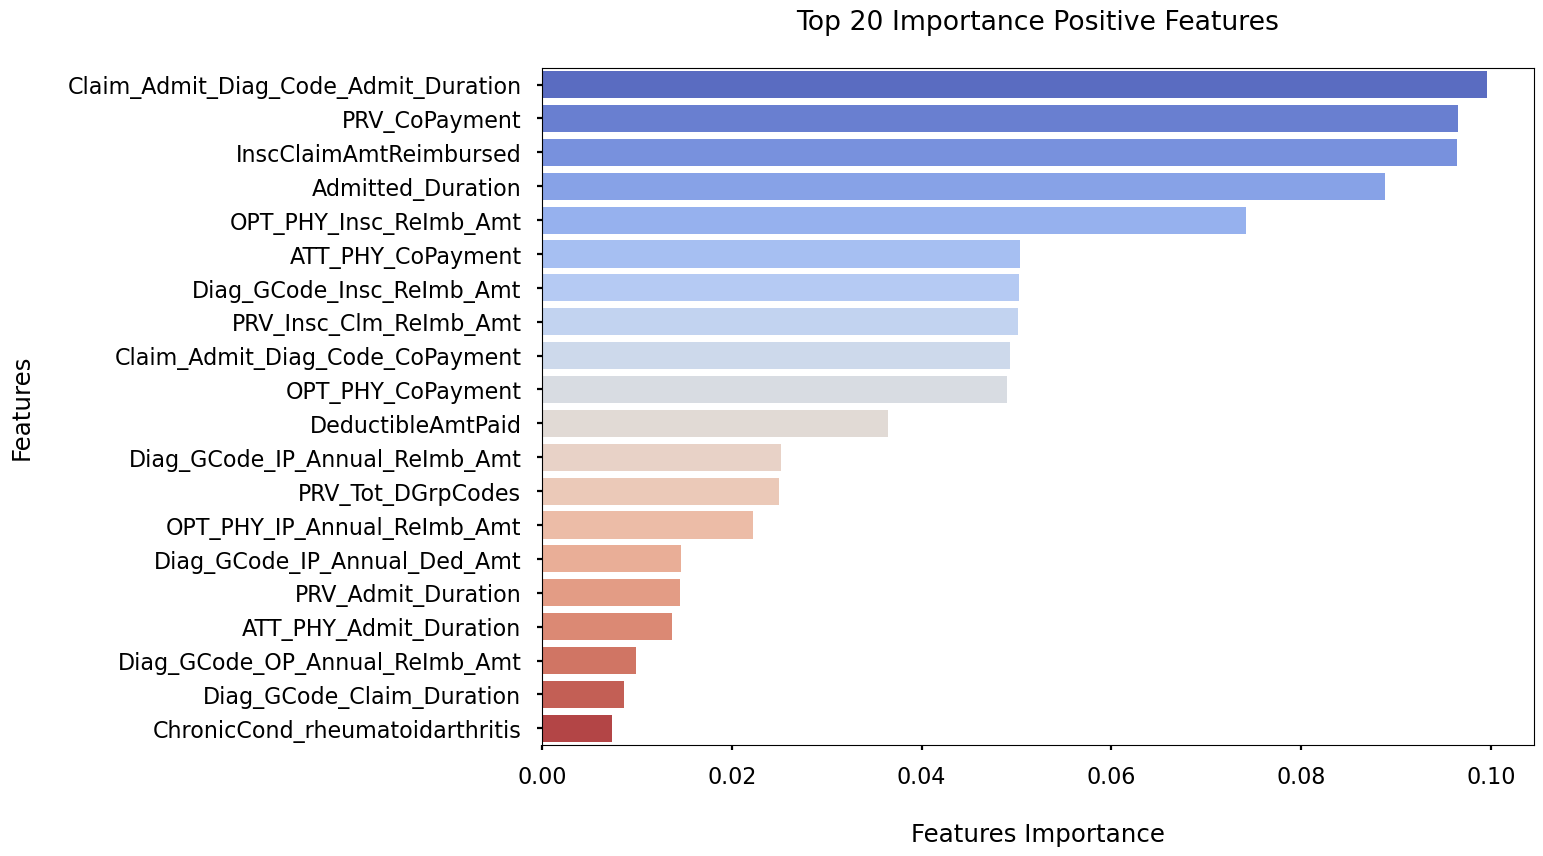

In [106]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 20 Importance Positive Features\n")

Using Minority Synthetic Oversampling
Train Test Split :: Creating TRAIN and VALIDATION sets.
Reasoning :: These sets will be used for measurng the performance of ML Models.

In [107]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, stratify=y, random_state=39)

In [108]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Checking count of tgt labels in y_train
y_train.value_counts()

0    3678
1     379
Name: PotentialFraud, dtype: int64

In [109]:
from sklearn.preprocessing import RobustScaler
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)
from collections import Counter

In [110]:
# BEFORE Oversampling :: Checking the percentage share of fraud and non-fraud records in the TRAIN set
counter = Counter(y_train)
counter

fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.34% and Non-Fraud Percentage = 90.66%


In [111]:
# Performing minority oversampling
from imblearn.over_sampling import ADASYN
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)
X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1263})

In [112]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 25.56% and Non-Fraud Percentage = 74.44%


In [113]:
# 4. Logistic Regression
# Training the model with all features and hyper-parameterized values
log_reg_4 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, 
                               solver='liblinear', 
                               tol=0.0001, 
                               max_iter=500, 
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_4.fit(X_train_ovsamp, y_train_ovsamp)

LogisticRegression(C=0.03, intercept_scaling=1.0, max_iter=500, penalty='l1',
                   random_state=49, solver='liblinear')

### Train AUC = 0.9274387048970211
### Test AUC = 0.9323643883829366


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


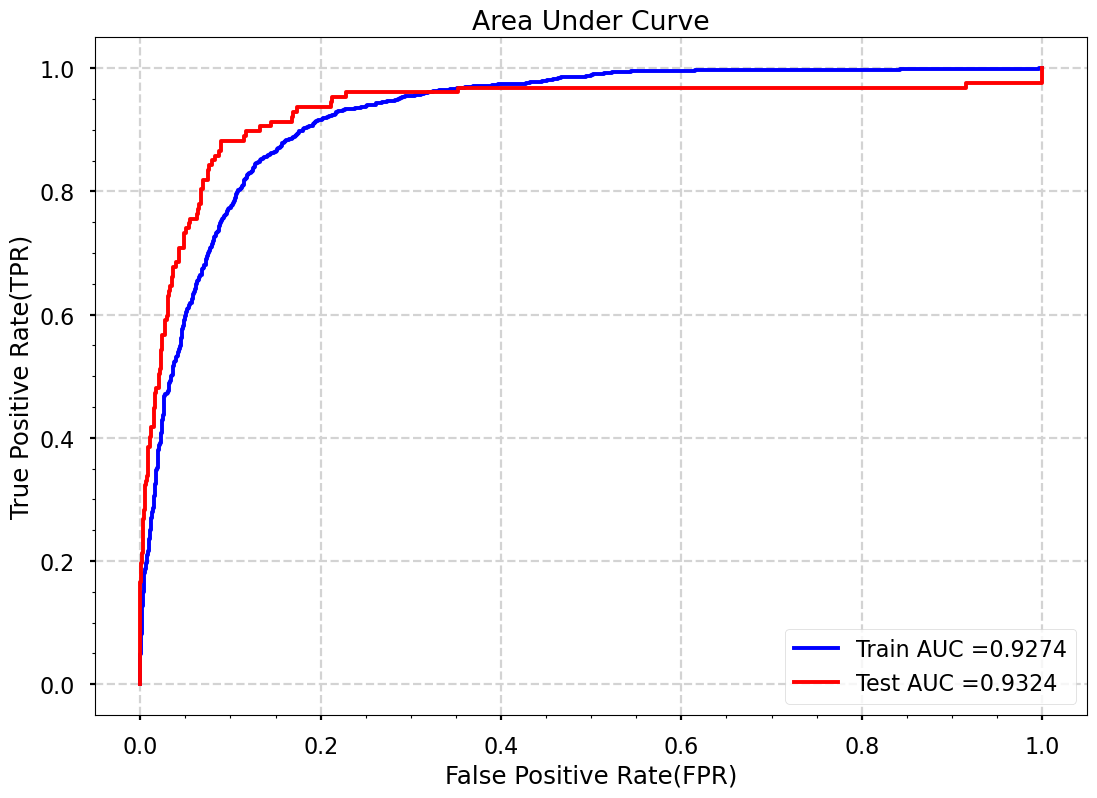

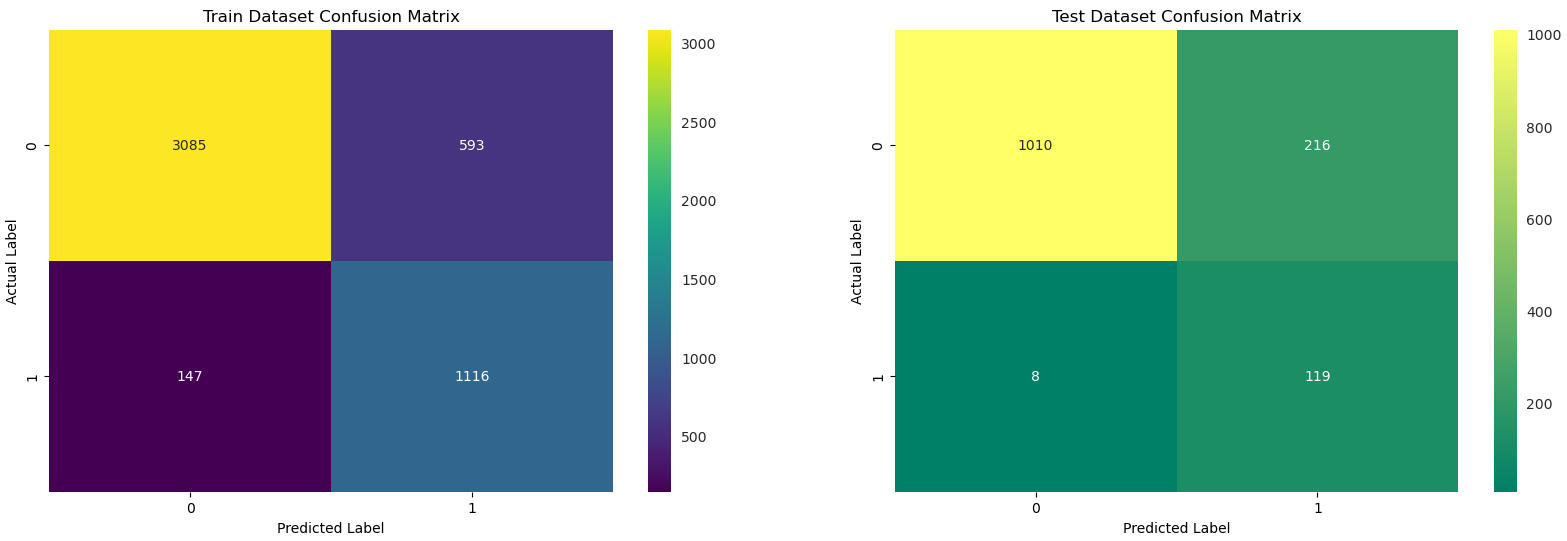



### Best Threshold = 0.1914
### Model AUC is : 0.9324
### Model Train F1 Score is : 0.7510
### Model Test F1 Score is : 0.5152


In [114]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_4, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [115]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_4.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.751089
1,ChronicCond_stroke,0.065296
2,Admitted_Duration,0.315205
3,PRV_Tot_DGrpCodes,-0.011497
4,PRV_Tot_Unq_DOB_Years,-0.394473


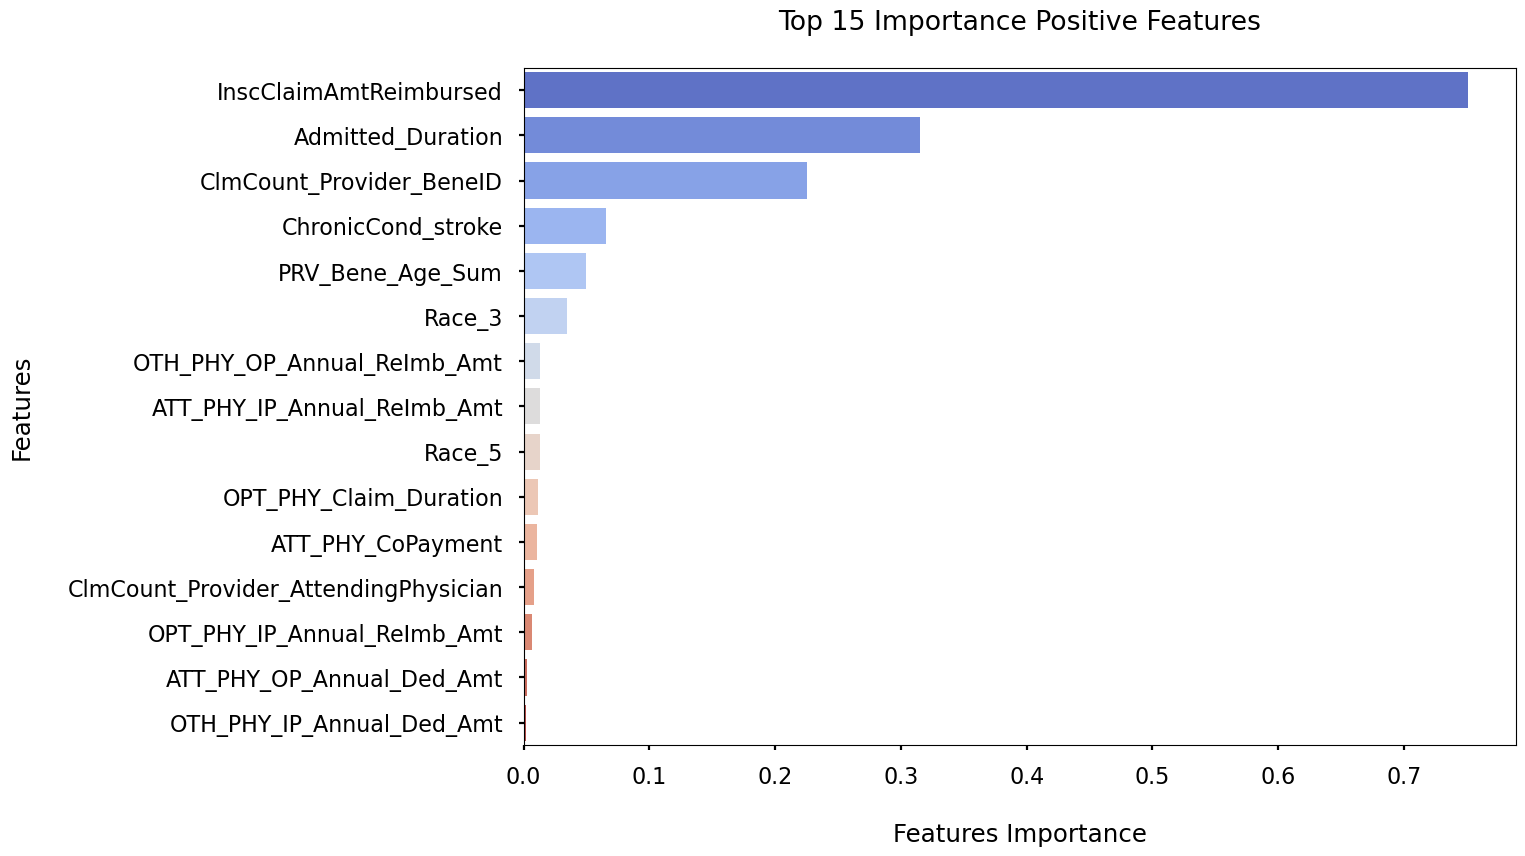

In [116]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

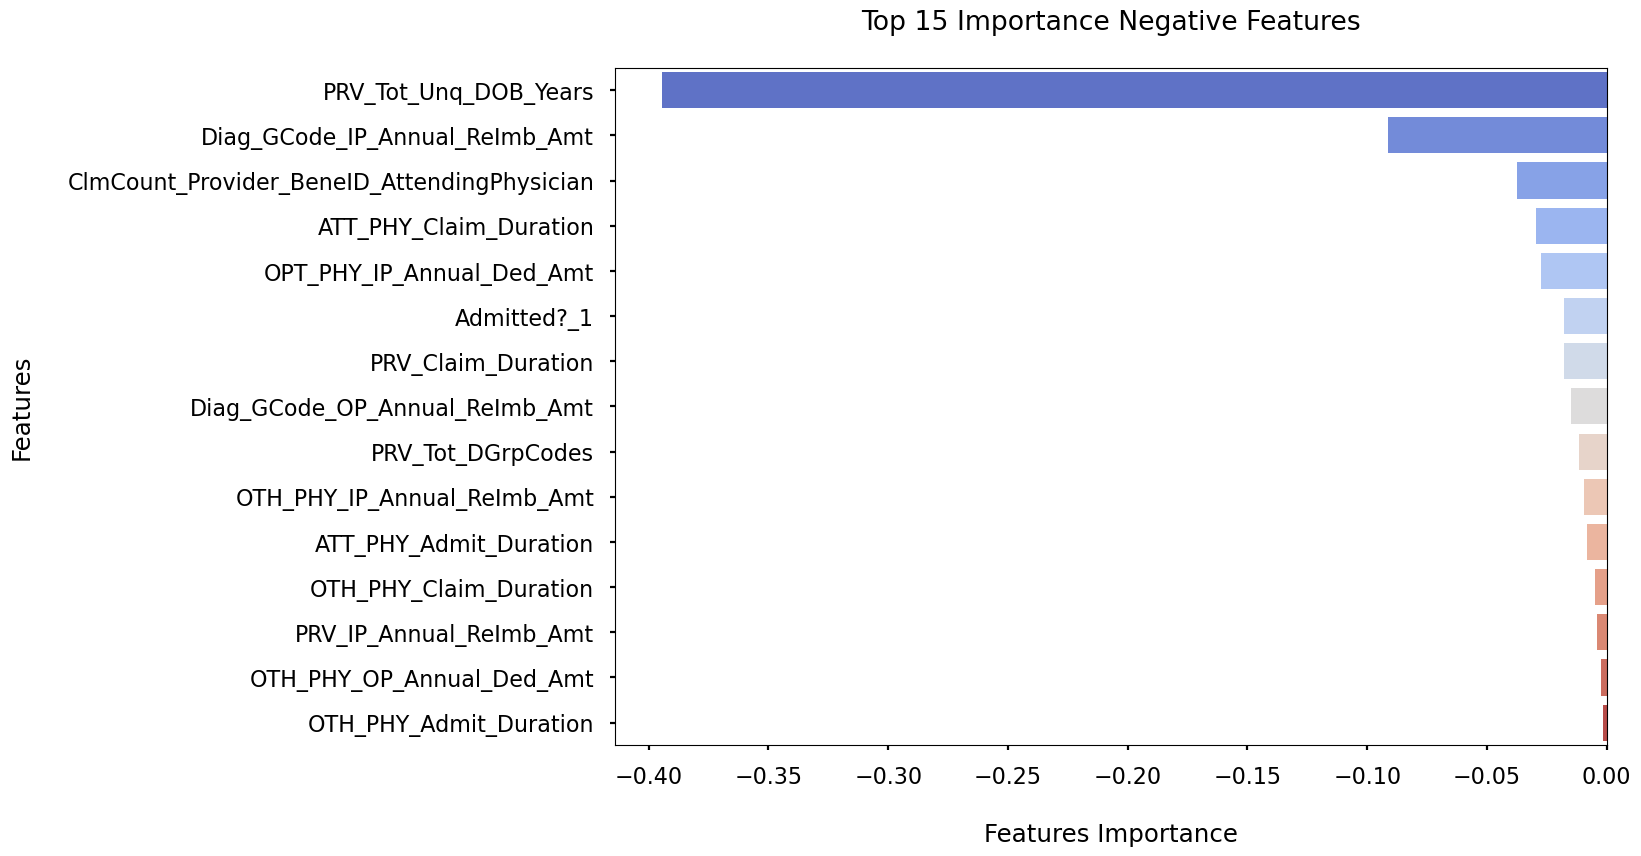

In [117]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Negative Features\n")

In [118]:
from sklearn.tree import DecisionTreeClassifier
# Training the model with all features and hyper-parameterized values
dec_tree_5 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_5.fit(X_train_ovsamp, y_train_ovsamp)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9148064049061054
### Test AUC = 0.9368665784639889


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


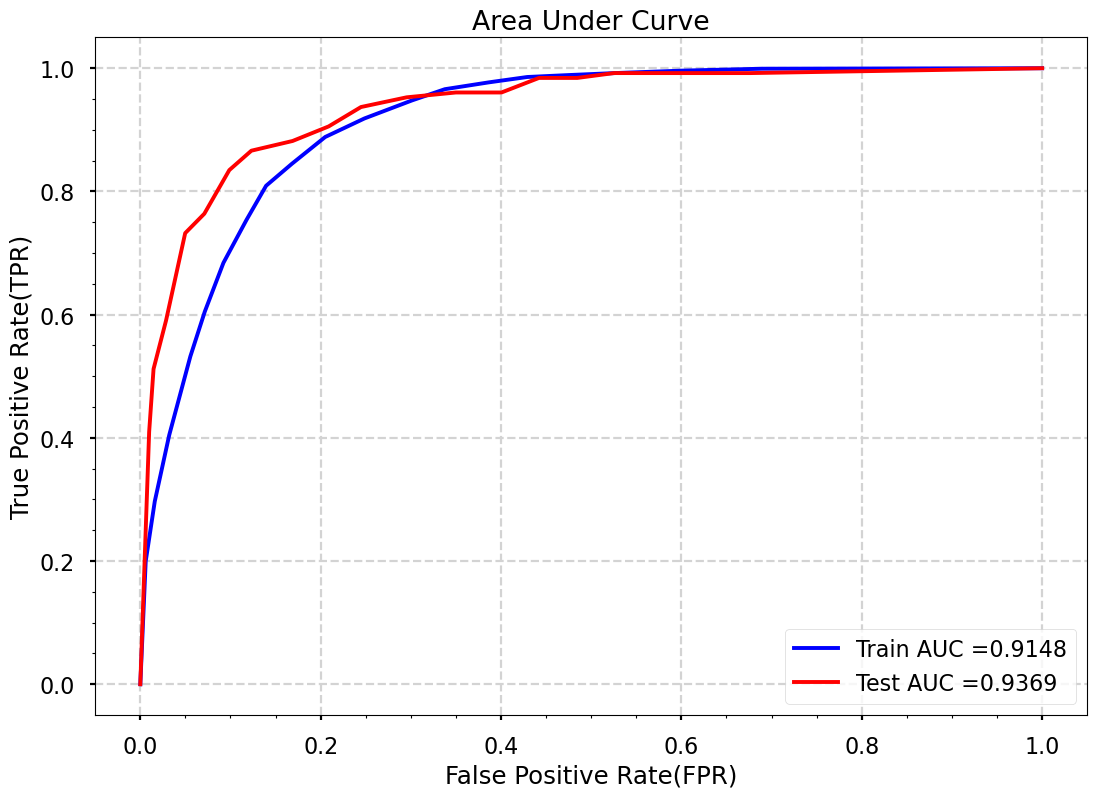

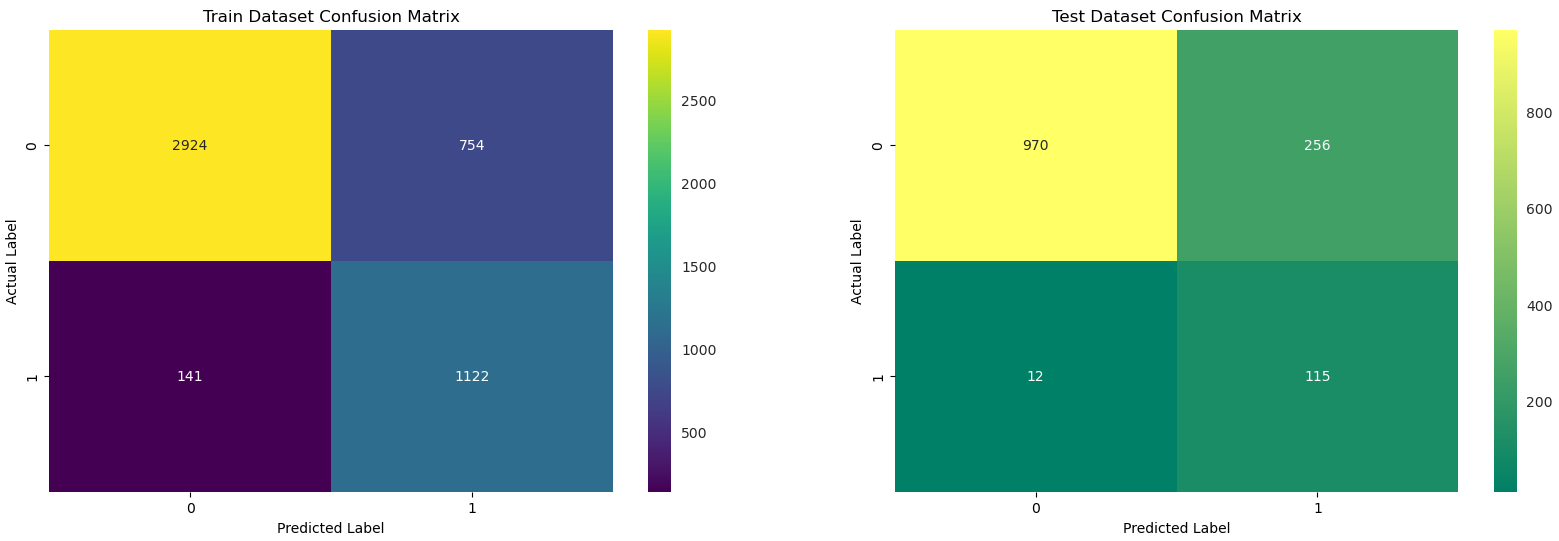



### Best Threshold = 0.2880
### Model AUC is : 0.9369
### Model Train F1 Score is : 0.7149
### Model Test F1 Score is : 0.4618


In [119]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))


In [120]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_5.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.021218
1,ChronicCond_Heartfailure,0.004497
2,ChronicCond_Depression,0.014485
3,ChronicCond_Osteoporasis,0.000072
4,IPAnnualReimbursementAmt,0.493389


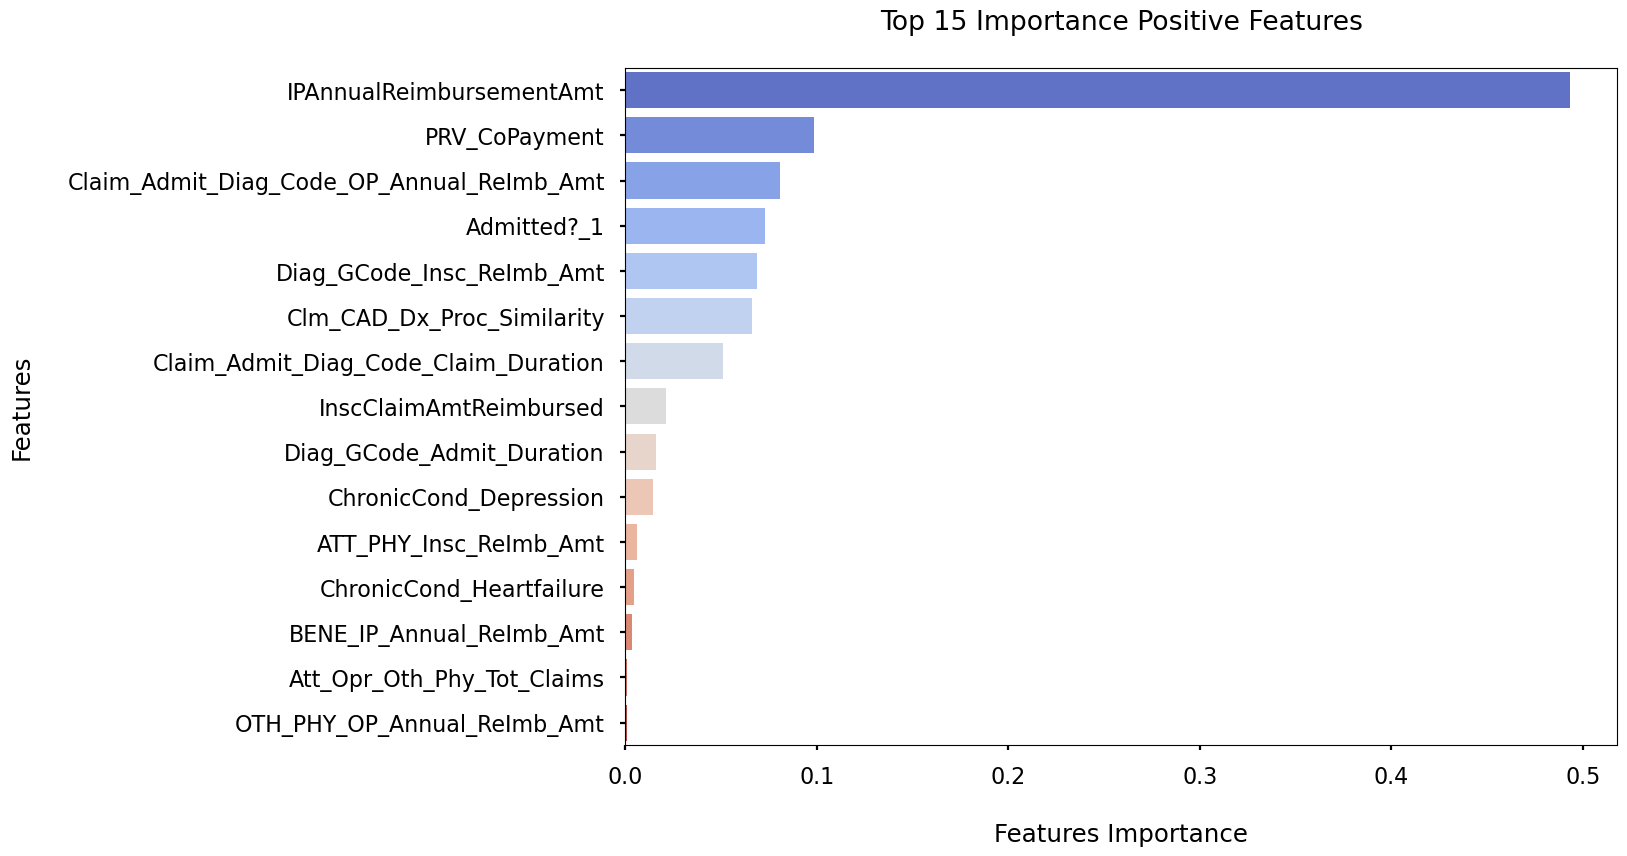

In [121]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

In [122]:
from sklearn.ensemble import RandomForestClassifier
# Training the model with all features and hyper-parameterized values
rfc_6 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_6.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9168023948434918
### Test AUC = 0.9460443668032523


C:\Users\Sheriff\AppData\Local\Temp\ipykernel_15516\3600671449.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='lightgrey', linestyle='--')


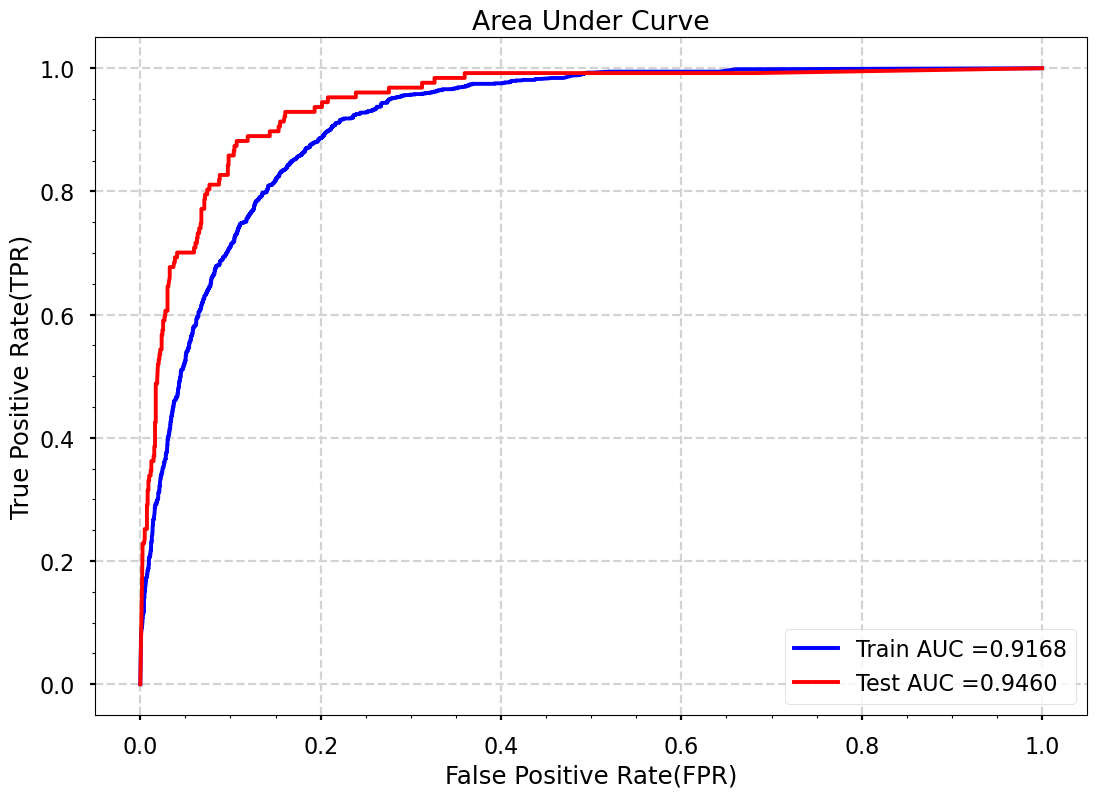

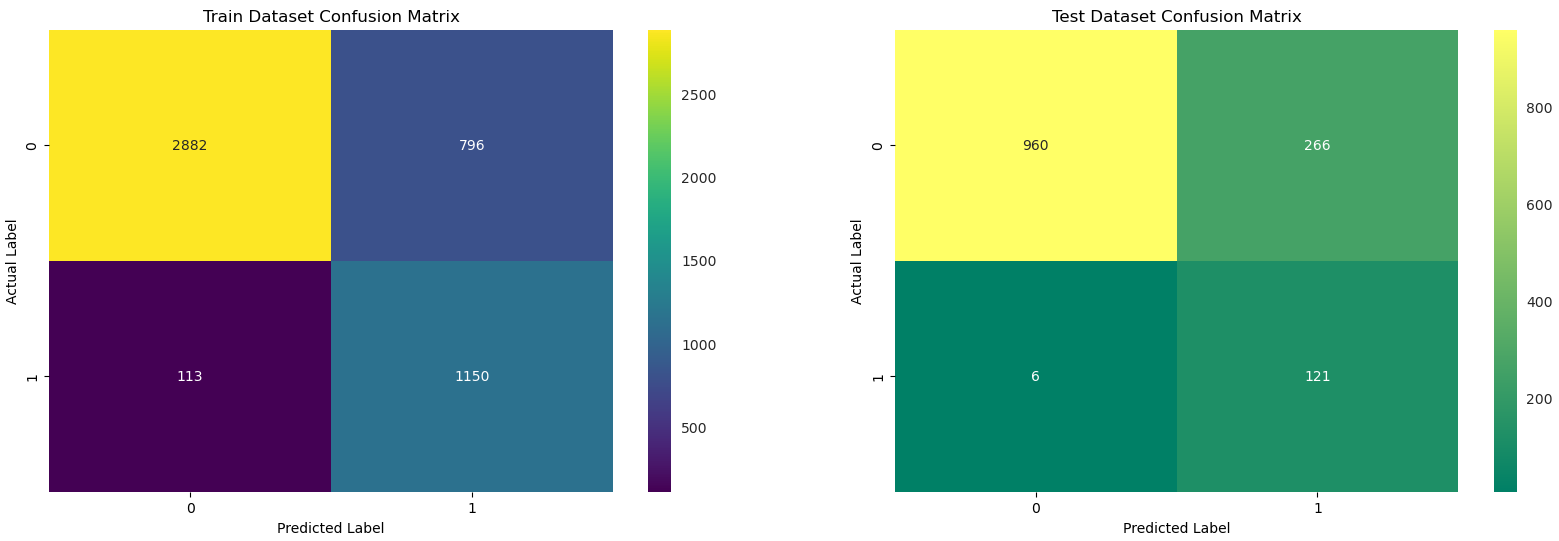



### Best Threshold = 0.0753
### Model AUC is : 0.9460
### Model Train F1 Score is : 0.7167
### Model Test F1 Score is : 0.4708


In [123]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [124]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.103122
1,DeductibleAmtPaid,0.017575
2,ChronicCond_Cancer,0.000972
3,ChronicCond_Depression,0.000118
4,ChronicCond_Diabetes,0.000124


In [125]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.103122
1,DeductibleAmtPaid,0.017575
2,ChronicCond_Cancer,0.000972
3,ChronicCond_Depression,0.000118
4,ChronicCond_Diabetes,0.000124


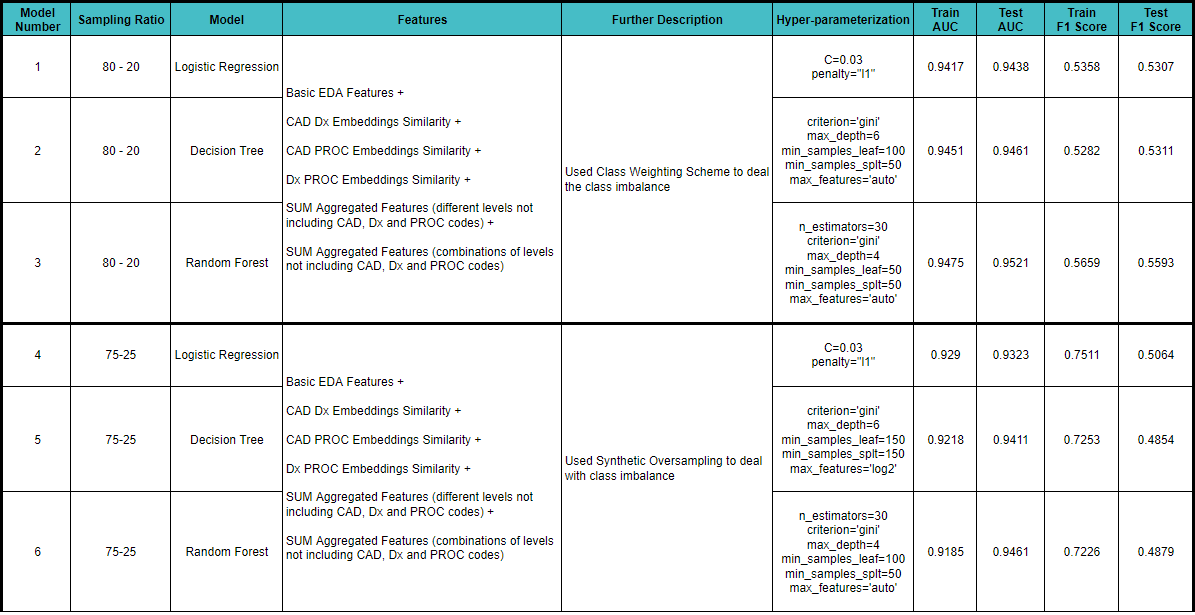

In [126]:
from IPython.display import Image
Image("Models_Set_2_Results.png")

# Models - SET 2 - OBSERVATIONS
Adding the Similarity Score features of embeddings b/w below mentioned doesn't really helped in improving the models performance:

CAD and Dx Codes
Dx and PROC Codes
CAD and PROC Codes
Doing the synthetic oversampling of the minority class doesn't provide gain in the model's performance whehreas we can see a noticeable drop in the performace.